In [1]:
import pandas as pd
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load dataset
data_amazon_phone = pd.read_csv('/content/drive/My Drive/amazon-cell-phone-reviews.csv')

In [6]:
data_amazon_phone.head()

,rating,title,body,text
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,"Def not best, but not worst I had the Samsung ..."
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Text Messaging Doesn't Work Due to a software ...
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...","Love This Phone This is a great, reliable phon..."
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...","Love the Phone, BUT...! I love the phone and a..."
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,"Great phone service and options, lousy case! T..."


# Data Preprocessing

In [5]:
# Remove unnecessary columns and handle missing values if any
data_amazon_phone = data_amazon_phone[['rating', 'title', 'body']].dropna()

# Combine title and body for analysis
data_amazon_phone['text'] = data_amazon_phone['title'] + " " + data_amazon_phone['body']

In [8]:
data_amazon_phone.head()

,rating,title,body,text
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,"Def not best, but not worst I had the Samsung ..."
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Text Messaging Doesn't Work Due to a software ...
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...","Love This Phone This is a great, reliable phon..."
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...","Love the Phone, BUT...! I love the phone and a..."
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,"Great phone service and options, lousy case! T..."


In [9]:
# Label encoding for sentiment (positive, neutral, negative)
def sentiment_label(rating):
    if rating > 3:
        return 'positive'
    else:
        return 'negative'

data_amazon_phone['sentiment'] = data_amazon_phone['rating'].apply(sentiment_label)

In [10]:
data_amazon_phone.head()

,rating,title,body,text,sentiment
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,"Def not best, but not worst I had the Samsung ...",negative
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Text Messaging Doesn't Work Due to a software ...,negative
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...","Love This Phone This is a great, reliable phon...",positive
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...","Love the Phone, BUT...! I love the phone and a...",negative
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,"Great phone service and options, lousy case! T...",positive


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Text preprocessing
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

data_amazon_phone['clean_text'] = data_amazon_phone['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


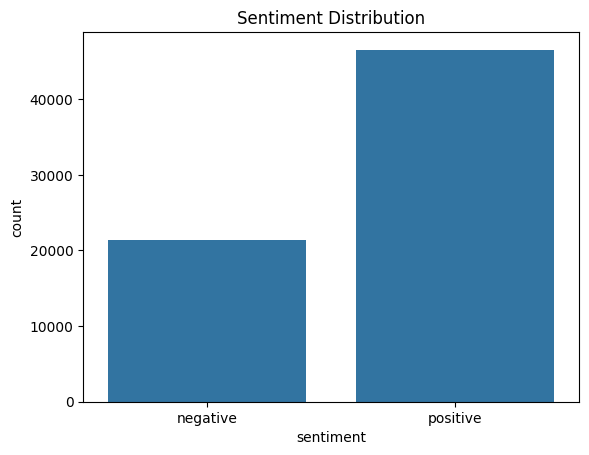

In [13]:
import seaborn as sns_amazon
import matplotlib.pyplot as plt_amazon
# Plot the distribution of sentiments
sns_amazon.countplot(x='sentiment', data=data_amazon_phone)
plt_amazon.title('Sentiment Distribution')
plt_amazon.show()

In [14]:
from nltk.stem import PorterStemmer
import re

# Initialize stemmer
stemmer = PorterStemmer()

# Extended text preprocessing function
def preprocess_text_extended(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Keep only alphanumeric characters and whitespace [[1](https://stackoverflow.com/questions/15547409/how-to-get-rid-of-punctuation-using-nltk-tokenizer)]

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords and short words, apply stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]

    return ' '.join(words)

# Apply extended preprocessing
data_amazon_phone['clean_text'] = data_amazon_phone['text'].apply(preprocess_text_extended)

In [15]:
data_amazon_phone.head()

,rating,title,body,text,sentiment,clean_text
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,"Def not best, but not worst I had the Samsung ...",negative,def best worst samsung a600 awhil absolut doo ...
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Text Messaging Doesn't Work Due to a software ...,negative,text messag doesnt work due softwar issu nokia...
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...","Love This Phone This is a great, reliable phon...",positive,love phone great reliabl phone also purchas ph...
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...","Love the Phone, BUT...! I love the phone and a...",negative,love phone love phone realli need one didnt ex...
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,"Great phone service and options, lousy case! T...",positive,great phone servic option lousi case phone gre...
